In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
sys.path.append(os.path.abspath("../src"))
from utils import evaluate_model


In [24]:
df = pd.read_csv('data/cleaned_data.csv')

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
X = df.drop("math_score",axis=1)
y = df["math_score"]

In [27]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [28]:
num_trf = StandardScaler()
cat_trf = OneHotEncoder()

In [29]:
preprocessor = ColumnTransformer(
    [
        ("One Hot Encoding",cat_trf,cat_features),
        ("Standard Scaler",num_trf,num_features),
    ]
)

In [30]:
X = preprocessor.fit_transform(X)

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
models = {
    "Linear Regression":LinearRegression(),
    "Decision Tree":DecisionTreeRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae,model_train_r2,model_train_mse,model_train_rmse = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_r2,model_test_mse,model_test_rmse = evaluate_model(y_test,y_test_pred)

    print(f'The model - {model}')
    print('Model Performence for training Set with model')
    print(f"Training result - MAE-{model_train_mae},r2-{model_train_r2},mse-{model_train_mse},rmse-{model_train_rmse}")
    print("-------------------------------------------------")
    print('Model Performence for test Set')
    print(f"Test result - MAE-{model_test_mae},r2-{model_test_r2},mse-{model_test_mse},rmse-{model_test_rmse}")
    print("-------------------------------------------------")

    r2_list.append(model_test_r2)
    model_list.append(model)


The model - LinearRegression()
Model Performence for training Set with model
Training result - MAE-4.266711846071957,r2-0.8743172040139593,mse-28.334870380648585,rmse-5.323050852720513
-------------------------------------------------
Model Performence for test Set
Test result - MAE-4.21476314247485,r2-0.8804332983749565,mse-29.095169866715484,rmse-5.393993869732842
-------------------------------------------------
The model - DecisionTreeRegressor()
Model Performence for training Set with model
Training result - MAE-0.01875,r2-0.9996534669718089,mse-0.078125,rmse-0.2795084971874737
-------------------------------------------------
Model Performence for test Set
Test result - MAE-6.1,r2-0.7495257632991752,mse-60.95,rmse-7.807048097712733
-------------------------------------------------


In [38]:
model_list

[LinearRegression(), DecisionTreeRegressor()]

In [39]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model', 'R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model,R2 Score
0,LinearRegression(),0.880433
1,DecisionTreeRegressor(),0.749526


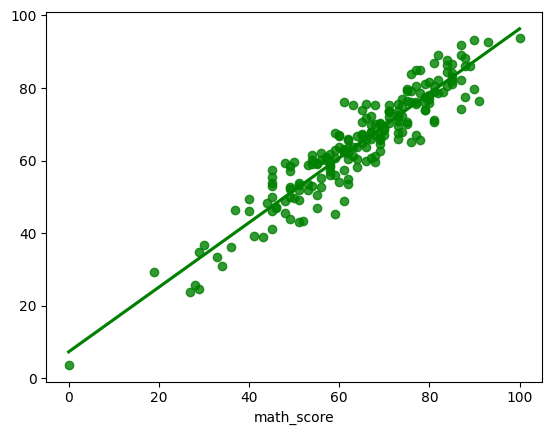

In [41]:
y_pred = (LinearRegression().fit(X_train,y_train)).predict(X_test)
score = r2_score(y_test,y_pred)*100
sns.regplot(x=y_test,y=y_pred,ci=None,color='green')
plt.show()

In [46]:
pred_df = pd.DataFrame({'Actual value':y_test,'Predicted Value':y_pred,'Residual':y_test-y_pred})
pred_df['Residual'] = np.abs(pred_df['Residual'])
pred_df['Accuracy (%)'] = pred_df.apply(lambda row: (row['Predicted Value'] / row['Actual value']) * 100 
                              if row['Actual value'] != 0 else None, axis=1)

In [47]:
pred_df

,Actual value,Predicted Value,Residual,Accuracy (%)
521,91,76.387970,14.612030,83.942824
737,53,58.885970,5.885970,111.105604
740,80,76.990265,3.009735,96.237831
660,74,76.851804,2.851804,103.853790
411,84,87.627378,3.627378,104.318307
...,...,...,...,...
408,52,43.409149,8.590851,83.479133
332,62,62.152214,0.152214,100.245507
208,74,67.888395,6.111605,91.741074
613,65,67.022287,2.022287,103.111211
